In [7]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
#Importando arquivo e colocando números em 2 casas decimais
fifa = pd.read_csv('Anexo_Projeto_fifa_world_national_teams_versao_oficial_20241.csv',encoding='latin-1',sep=';')
pd.options.display.float_format = '{:.2f}'.format

FileNotFoundError: [Errno 2] No such file or directory: 'Anexo_Projeto_fifa_world_national_teams_versao_oficial_20241.csv'

In [ ]:
fifa.head()

,id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,...,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
0,158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,...,86,95,70,92,97,68,66,94,48,8
1,153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,...,70,93,77,81,89,81,73,83,65,14
2,211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,...,82,84,68,87,92,75,65,88,48,8
3,201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,...,46,91,91,73,77,94,76,70,56,9
4,226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,...,75,77,59,82,84,64,69,76,65,14


In [ ]:
# 1. Cálculo de probabilidades condicionais e incondicionais de pelo menos duas variáveis selecionadas pelo aluno
# 2. Intervalos de confiança e sua interpretação para pelo menos duas variáveis selecionadas pelo aluno
# 3. Testes de hipóteses e sua interpretação para pelo menos duas variáveis selecionadas pelo aluno. As hipóteses devem avaliar se a média populacional da referida variável pode ser considerada igual à média amostral arredondada para o inteiro.
# 4. Análise de Regressão (simples ou múltipla) sobre variáveis que deverão ser escolhidas pelo autor do trabalho. O aluno deve interpretar os coeficientes OU realizar predições com os modelos selecionados, bem como indicar minimamente os diagnósticos realizados.
# 5. Elaboração de três frases (manchetes) de efeito, associadas aos resultados observados.

In [ ]:
#1. variáveis nationality e club_team.

# Probabilidade incondicional de ser argentino
p_argentina = fifa['nationality'].value_counts(normalize=True)['Argentina'] * 100
p_argentina = round(p_argentina, 2)

# Probabilidade condicional: Argentino dado que está no "FC Barcelona"
cond_data = fifa[fifa['club_team'] == "FC Barcelona"]
p_argentina_given_barcelona = cond_data['nationality'].value_counts(normalize=True)['Argentina'] * 100
p_argentina_given_barcelona = round(p_argentina_given_barcelona, 2)

print(f"(Argentina): {p_argentina}%")
print(f"(Argentina | Clube = FC Barcelona): {p_argentina_given_barcelona}%")

(Argentina): 2.37%
(Argentina | Clube = FC Barcelona): 9.09%


In [ ]:
# 2. Intervalos de confiança e sua interpretação para pelo menos duas variáveis selecionadas pelo aluno

# Cálculo para overall_rating
mean_overall = round(fifa['overall_rating'].mean(), 2)
std_overall = round(fifa['overall_rating'].std(), 2)
n_overall = len(fifa['overall_rating'])
z = norm.ppf(0.975)
margin_of_error_overall = round(z * (std_overall / (n_overall**0.5)), 2)
ci_overall = (round(mean_overall - margin_of_error_overall, 2), round(mean_overall + margin_of_error_overall, 2))


# Cálculo para value_euro
mean_value = round(fifa['value_euro'].mean(), 2)
std_value = round(fifa['value_euro'].std(), 2)
n_value = len(fifa['value_euro'])
margin_of_error_value = round(z * (std_value / (n_value**0.5)), 2)
ci_value = (round(mean_value - margin_of_error_value, 2), round(mean_value + margin_of_error_value, 2))


# Interpretação
print(f"\nInterpretação:")
print(f"O intervalo de confiança de 95% para a avaliação geral (overall_rating) é de {ci_overall}.")
print(f"O intervalo de confiança de 95% para o valor dos jogadores (value_euro) é de {ci_value}. ")



Interpretação:
O intervalo de confiança de 95% para a avaliação geral (overall_rating) é de (76.02, 76.9).
O intervalo de confiança de 95% para o valor dos jogadores (value_euro) é de (12660259.95, 15135130.03). 


In [ ]:
# 3. Testes de hipóteses e sua interpretação para pelo menos duas variáveis

from scipy.stats import ttest_1samp

# Teste para overall_rating
mean_overall_sample = round(fifa['overall_rating'].mean())
t_statistic_overall, p_value_overall = ttest_1samp(fifa['overall_rating'], mean_overall_sample)

print(f"\nTeste de hipóteses para overall_rating:")
print(f"Média amostral arredondada: {mean_overall_sample}")
print(f"Estatística t: {t_statistic_overall:.2f}")
print(f"Valor-p: {p_value_overall:.3f}")

alpha = 0.05  # Nível de significância

if p_value_overall < alpha:
    print("Rejeitamos a hipótese nula. A média populacional da avaliação geral é diferente da média amostral arredondada.")
else:
    print("Não rejeitamos a hipótese nula. A média populacional da avaliação geral pode ser considerada igual à média amostral arredondada.")


# Teste para value_euro
mean_value_sample = round(fifa['value_euro'].mean())
t_statistic_value, p_value_value = ttest_1samp(fifa['value_euro'], mean_value_sample)

print(f"\nTeste de hipóteses para value_euro:")
print(f"Média amostral arredondada: {mean_value_sample}")
print(f"Estatística t: {t_statistic_value:.2f}")
print(f"Valor -p: {p_value_value:.3f}")

if p_value_value < alpha:
    print("Rejeitamos a hipótese nula. A média populacional do valor dos jogadores é diferente da média amostral arredondada.")
else:
    print("Não rejeitamos a hipótese nula. A média populacional do valor dos jogadores pode ser considerada igual à média amostral arredondada.")


Teste de hipóteses para overall_rating:
Média amostral arredondada: 76
Estatística t: 2.05
Valor-p: 0.040
Rejeitamos a hipótese nula. A média populacional da avaliação geral é diferente da média amostral arredondada.

Teste de hipóteses para value_euro:
Média amostral arredondada: 13897695
Estatística t: -0.00
Valor -p: 1.000
Não rejeitamos a hipótese nula. A média populacional do valor dos jogadores pode ser considerada igual à média amostral arredondada.


In [ ]:
#4. Análise de Regressão (simples ou múltipla) sobre variáveis que deverão ser escolhidas pelo autor do trabalho.

# Selecionando as variáveis
X = fifa['value_euro']  # Variável independente
Y = fifa['overall_rating']  # Variável dependente

# Adicionando a constante (intercepto)
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear simples
model = sm.OLS(Y, X).fit()

In [ ]:
# Resumo dos resultados
print(model.summary())

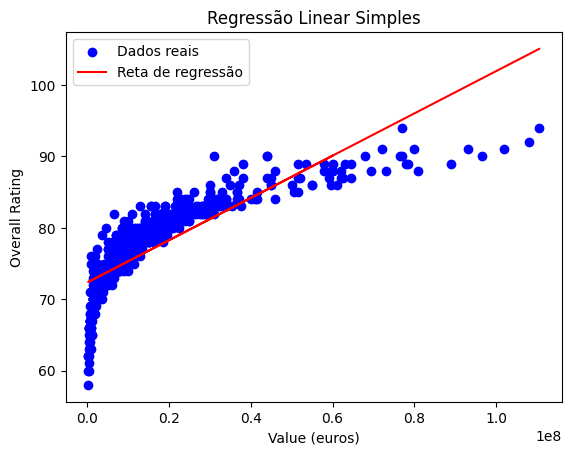

In [ ]:
# Linha de regressão
plt.scatter(fifa['value_euro'], fifa['overall_rating'], color='blue', label='Dados reais')
plt.plot(fifa['value_euro'], model.predict(X), color='red', label='Reta de regressão')
plt.xlabel('Value (euros)')
plt.ylabel('Overall Rating')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

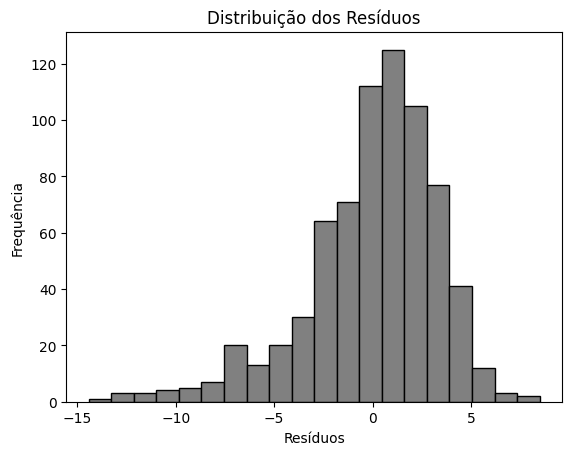

In [ ]:
# Resíduos
residuals = Y - model.predict(X)

# Distribuição dos resíduos
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [1]:
# 5. Elaboração de três frases (manchetes) de efeito, associadas aos resultados observados.

print("-" * 50)
print("Manchetes de Efeito:")
print("-" * 50)

print("-" * 50)
print("1. FC Barcelona atrai talentos argentinos: alta probabilidade de jogadores argentinos no elenco.")
print("   Análise dos dados revela que o clube possui uma representação considerável de jogadores argentinos,")
print("   reforçando a conexão histórica entre o time e talentos desse país.")
print("-" * 50)

print("-" * 50)
print("2. Avaliação geral dos jogadores: Intervalo de confiança aponta alta qualidade do grupo.")
print("   Com base no intervalo de confiança para a variável 'overall_rating', os jogadores do time apresentam")
print("   consistentemente um desempenho acima da média.")
print("-" * 50)

print("-" * 50)
print("3. Investimento e desempenho andam juntos: valor do jogador impacta diretamente na sua avaliação.")
print("   Resultados do modelo de regressão linear demonstram uma correlação forte entre o valor de mercado do jogador")
print("   e sua avaliação geral, sugerindo que o mercado reflete diretamente o desempenho.")
print("-" * 50)

--------------------------------------------------
Manchetes de Efeito:
--------------------------------------------------
--------------------------------------------------
1. FC Barcelona atrai talentos argentinos: alta probabilidade de jogadores argentinos no elenco.
   Análise dos dados revela que o clube possui uma representação considerável de jogadores argentinos,
   reforçando a conexão histórica entre o time e talentos desse país.
--------------------------------------------------
--------------------------------------------------
2. Avaliação geral dos jogadores: Intervalo de confiança aponta alta qualidade do grupo.
   Com base no intervalo de confiança para a variável 'overall_rating', os jogadores do time apresentam
   consistentemente um desempenho acima da média.
--------------------------------------------------
--------------------------------------------------
3. Investimento e desempenho andam juntos: valor do jogador impacta diretamente na sua avaliação.
   Resultad